# Predict Pneumonia from x-ray scans
Made by
- Yannick K. Hartington

### Import Libraries

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Layer, Input, Flatten, BatchNormalization, ReLU, Dropout, Dense, Conv2D, MaxPooling2D
from keras.models import Model
from keras import activations, regularizers, initializers, layers

### Load dataset

In [6]:
target_size = (224, 224)
seed = 42
#path_dataset = r'/mnt/c/Datasets/Chest X-Ray Images/chest_xray' # WSL
path_dataset = r'C:\Datasets\Chest X-Ray Images\chest_xray' # Windows

In [7]:
# Pixel values are typically between 0 and 255 
# We would like to have them between 0 and 1
rescaling = 1./255 

In [8]:
train_datagen = ImageDataGenerator(
    rescale=rescaling,
    rotation_range=10,
    brightness_range=[0.7,1.3],
    )
train_generator = train_datagen.flow_from_directory(
    (path_dataset + '/train'),
    seed=seed,
    target_size=target_size,
    batch_size=32,
    class_mode='binary',
    )

val_datagen = ImageDataGenerator(
    rescale=rescaling, 
)
validation_generator = val_datagen.flow_from_directory(
    (path_dataset + '/val'),
    seed=seed,
    target_size=target_size,
    batch_size=32,
    class_mode='binary',
    )

test_datagen = ImageDataGenerator(
    rescale=rescaling, 
)
test_generator = test_datagen.flow_from_directory(
    (path_dataset + '/test'),
    seed=seed,
    target_size=target_size,
    batch_size=32,
    class_mode='binary',
    )

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


### Some images from the dataset

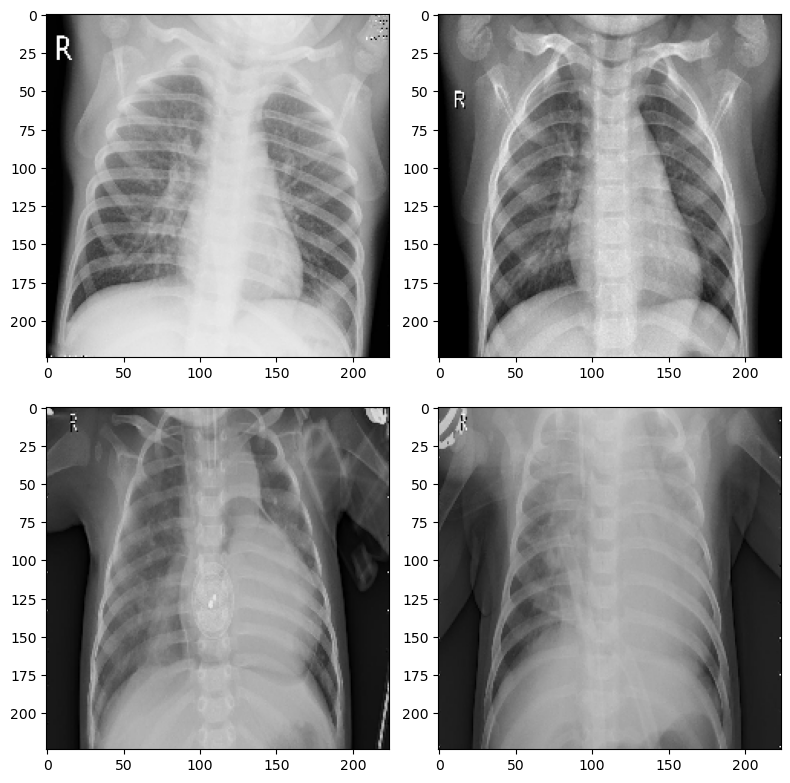

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

for i in range(2):
    for j in range(2):
        # Get the next image and label from the generator
        img, label = test_generator.next()
        axes[i, j].imshow(img[0])

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

## Model

In [10]:
inputs = Input((target_size[0], target_size[1], 3))
x = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = MaxPooling2D((2,2))(x)

#x = Dropout(0.1)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = MaxPooling2D((2,2))(x)

#X = Dropout(0.2)(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = MaxPooling2D((2,2))(x)

#X = Dropout(0.3)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = ReLU()(x)
#x = MaxPooling2D((2,2))(x)
x = BatchNormalization()(x)

X = Dropout(0.2)(x)
x = Conv2D(64, (1, 7), activation='relu')(x)
x = Conv2D(64, (7, 1), activation='relu')(x)
x = BatchNormalization()(x)
x = ReLU()(x)
#x = MaxPooling2D((2,2))(x)


x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dense(32, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)
model = Model(inputs, output)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)      │      1,792 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 64)      │     36,928 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization             │ (None, 224, 224, 64)      │        256 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ re_lu (ReLU)                    │ (None, 224, 224, 64)      │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)      │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 64)      │     36,928 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_1           │ (None, 112, 112, 64)      │        256 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ re_lu_1 (ReLU)                  │ (None, 112, 112, 64)      │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_3 (Conv2D)               │ (None, 54, 54, 64)        │     36,928 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_2           │ (None, 54, 54, 64)        │        256 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ re_lu_2 (ReLU)                  │ (None, 54, 54, 64)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 27, 27, 64)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_4 (Conv2D)               │ (None, 27, 27, 64)        │     36,928 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ re_lu_3 (ReLU)                  │ (None, 27, 27, 64)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_3           │ (None, 27, 27, 64)        │        256 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_5 (Conv2D)               │ (None, 27, 21, 64)        │     28,736 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_6 (Conv2D)               │ (None, 21, 21, 64)        │     28,736 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_4           │ (None, 21, 21, 64)        │        256 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ re_lu_4 (ReLU)                  │ (None, 21, 21, 64)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_7 (Conv2D)               │ (None, 21, 21, 64)        │     36,928 │
├─────────────────────────────────┼───────────────────────────┼──────────

 Total params: 450,305 (1.72 MB)

 Trainable params: 449,537 (1.71 MB)

 Non-trainable params: 768 (3.00 KB)

## We would like to see, what the model is looking at to predict if the patient has pneumonia